# ANÁLISIS COMPARATIVO DE TÉCNICAS DE APRENDIZAJE AUTOMÁTICO PARA ANÁLISIS DE SENTIMIENTO SOBRE RESEÑAS EN ESPAÑOL DE RESTAURANTES EN TRIPADVISOR 

## Preparar datos

#### Importar bibliotecas/conjuntos de datos y realizar un análisis exploratorio de datos

In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS  #palabras mas representativas

In [2]:
#Cargar datos
reviews_df = pd.read_csv("comentarios_restaurantes_esp_mitad.cvs")

In [3]:
#Veamos el conjunto de datos
reviews_df

,Texto,Sentimiento
0,Wow... Me encantó este lugar.,1
1,La comida no es buena.,0
2,No es sabroso y la textura era simplemente des...,0
3,Pasamos por aquí en mayo por recomendación de ...,1
4,La selección del menú era estupenda y los prec...,1
...,...,...
667,Después de todas las críticas favorables no po...,0
668,Del Taco es bastante desagradable y debe evita...,0
669,NO es difícil hacer una hamburguesa decente.,0
670,Pero no me gusta.,0


In [4]:
# información del dataframe 
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Texto        672 non-null    object
 1   Sentimiento  672 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.6+ KB


In [5]:
# comprobar si hay valores nulos
reviews_df.isnull().sum()

Texto          0
Sentimiento    0
dtype: int64


- **¿Cuántos elementos únicos hay en la columna 'sentiment' ?**

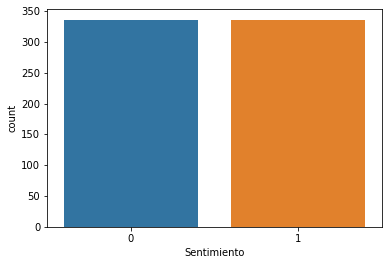

In [6]:
sns.countplot(reviews_df['Sentimiento'])

- **¿Cuántos clases hay?**

In [7]:
reviews_df['Sentimiento'].nunique()

2

## Pre-procesamiento

In [8]:
#utilidades
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_review(review):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('spanish')
    # eliminar tipos como $GE
    review = re.sub(r'\$\w*', '', review)
    # eliminaer el antiguo texto de rereview "RT"
    review = re.sub(r'^RT[\s]+', '', review)
    # eliminar hyperlinks
    review = re.sub(r'https?:\/\/.*[\r\n]*', '', review)
    # eliminar hashtags
    #  sólo quitando el signo # de la palabra
    review = re.sub(r'#', '', review)
    # tokenizar texto
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    review_tokens = tokenizer.tokenize(review)

    reviews_clean = []
    for word in review_tokens:
        if (word not in stopwords_english and  # eliminar las palabras vacias (stopwords)
                word not in string.punctuation):  # eliminar la puntuacion
            stem_word = stemmer.stem(word)  # convertir a palabra de origen (stemming word)
            reviews_clean.append(stem_word)
    return reviews_clean

In [9]:
reviews_df['Processed Text'] = reviews_df['Texto'].apply(process_review)

In [10]:
reviews_df['Texto'][2]

'No es sabroso y la textura era simplemente desagradable.'

In [11]:
reviews_df['Processed Text'][2]

['sabroso', 'textura', 'simplement', 'desagrad']

In [12]:
#Visualización de las reseñas despues de preprocesamiento de texto
reviews_df

,Texto,Sentimiento,Processed Text
0,Wow... Me encantó este lugar.,1,"[wow, ..., encantó, lugar]"
1,La comida no es buena.,0,"[comida, buena]"
2,No es sabroso y la textura era simplemente des...,0,"[sabroso, textura, simplement, desagrad]"
3,Pasamos por aquí en mayo por recomendación de ...,1,"[pasamo, aquí, mayo, recomendación, rick, stev..."
4,La selección del menú era estupenda y los prec...,1,"[selección, menú, estupenda, precio]"
...,...,...,...
667,Después de todas las críticas favorables no po...,0,"[despué, toda, crítica, favor, podía, esperar,..."
668,Del Taco es bastante desagradable y debe evita...,0,"[taco, bastant, desagrad, debe, evitars, si, p..."
669,NO es difícil hacer una hamburguesa decente.,0,"[difícil, hacer, hamburguesa, decent]"
670,Pero no me gusta.,0,[gusta]


In [13]:
reviews_df['Processed Text Join'] = reviews_df['Processed Text'].apply(lambda x: " ".join(x))
reviews_df

,Texto,Sentimiento,Processed Text,Processed Text Join
0,Wow... Me encantó este lugar.,1,"[wow, ..., encantó, lugar]",wow ... encantó lugar
1,La comida no es buena.,0,"[comida, buena]",comida buena
2,No es sabroso y la textura era simplemente des...,0,"[sabroso, textura, simplement, desagrad]",sabroso textura simplement desagrad
3,Pasamos por aquí en mayo por recomendación de ...,1,"[pasamo, aquí, mayo, recomendación, rick, stev...",pasamo aquí mayo recomendación rick steve encantó
4,La selección del menú era estupenda y los prec...,1,"[selección, menú, estupenda, precio]",selección menú estupenda precio
...,...,...,...,...
667,Después de todas las críticas favorables no po...,0,"[despué, toda, crítica, favor, podía, esperar,...",despué toda crítica favor podía esperar comer ...
668,Del Taco es bastante desagradable y debe evita...,0,"[taco, bastant, desagrad, debe, evitars, si, p...",taco bastant desagrad debe evitars si posibl
669,NO es difícil hacer una hamburguesa decente.,0,"[difícil, hacer, hamburguesa, decent]",difícil hacer hamburguesa decent
670,Pero no me gusta.,0,[gusta],gusta


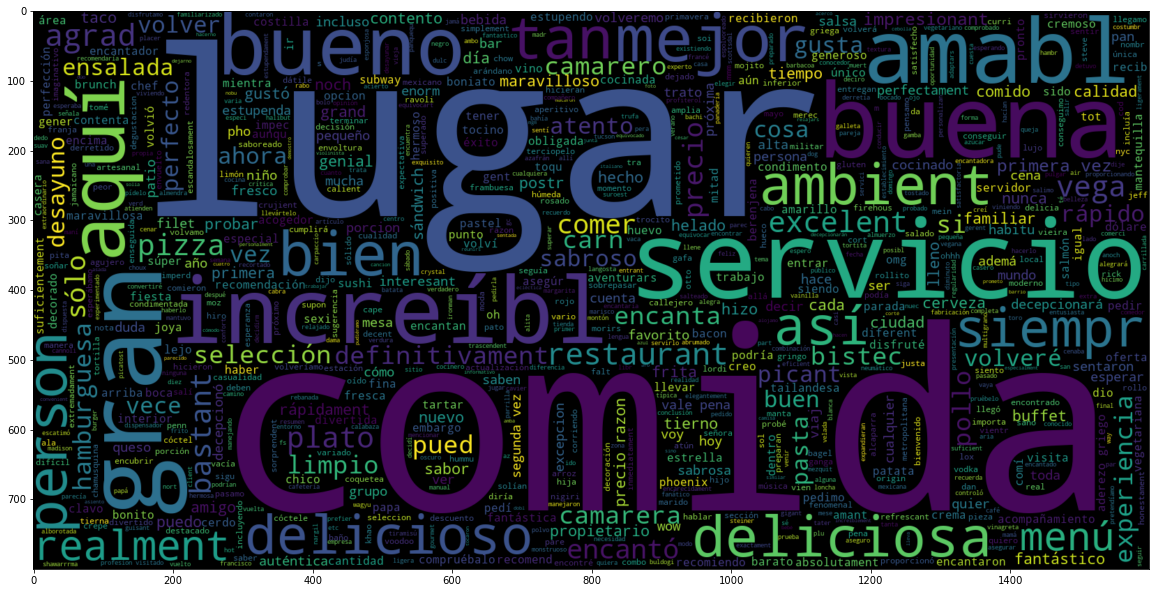

In [14]:
#Visualización de las palabras más frecuentes en reseñas positivas
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(reviews_df[reviews_df['Sentimiento'] == 1]['Processed Text Join']))
plt.imshow(wc, interpolation = 'bilinear'); 

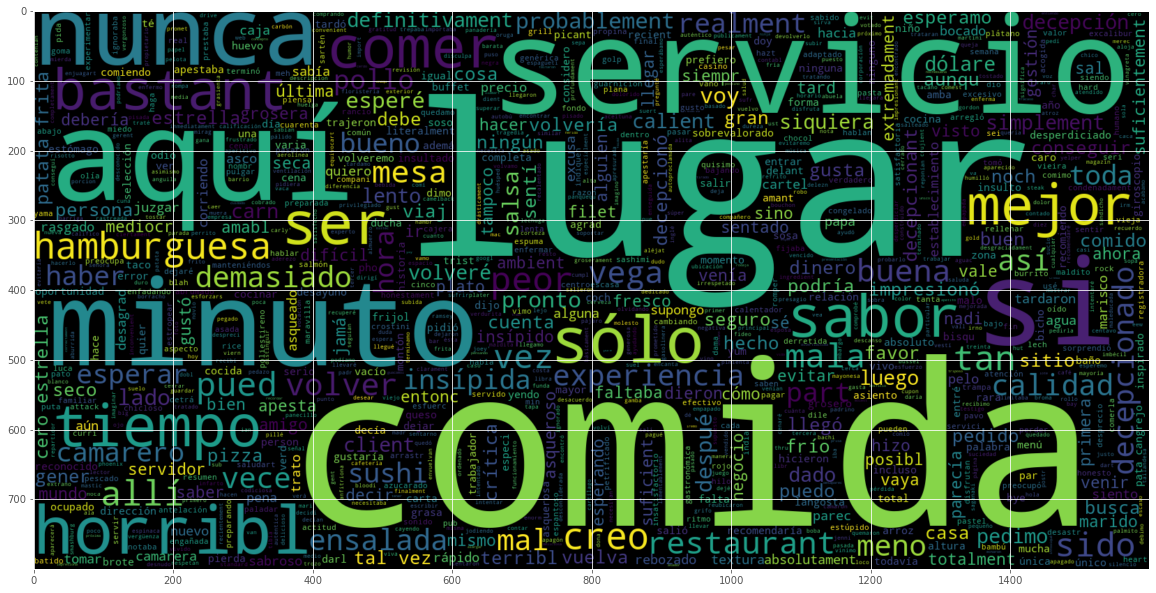

In [63]:
#Visualización de las palabras más frecuentes en reseñas negativas

plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(reviews_df[reviews_df['Sentimiento'] == 0]['Processed Text Join']))
plt.imshow(wc, interpolation = 'bilinear');

## Selección de caracteristicas

#### Por Frecuencias

In [16]:
def build_freqs(reviews, ys):
    yslist = np.squeeze(ys).tolist()
    # Comienza con un diccionario vacío y lo rellena haciendo un bucle sobre todos los reviews
    # y sobre todas las palabras procesadas en cada review.
    freqs = {}
    for y, review in zip(yslist, reviews):
        for word in process_review(review):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [17]:
# dividir los datos en prueba y entrenamiento 
X = reviews_df['Texto']
y = reviews_df['Sentimiento']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

#### Creando diccionario

In [18]:
freqs = build_freqs(X_train, y_train)

In [19]:
# comprobando el resultado
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 1802


In [20]:
freqs

{('decepcionant', 0): 4,
 ('si', 0): 16,
 ('alguien', 0): 3,
 ('pide', 0): 1,
 ('do', 0): 4,
 ('taco', 0): 1,
 ('¿', 0): 5,
 ('cree', 0): 1,
 ('pued', 0): 8,
 ('ser', 0): 13,
 ('part', 0): 5,
 ('servicio', 0): 23,
 ('client', 0): 5,
 ('preguntar', 0): 1,
 ('combo', 0): 1,
 ('carta', 0): 2,
 ('volví', 0): 1,
 ('hoy', 0): 1,
 ('reubicaron', 0): 1,
 ('todavía', 0): 2,
 ('impresionó', 0): 3,
 ('pollo', 0): 5,
 ('dieron', 0): 3,
 ('definitivament', 0): 5,
 ('recalentado', 0): 1,
 ('sólo', 0): 14,
 ('bien', 0): 3,
 ('cuña', 0): 1,
 ('fría', 0): 1,
 ('empapada', 0): 1,
 ('despué', 0): 6,
 ('subir', 0): 1,
 ('coch', 0): 2,
 ('esperé', 0): 6,
 ('15', 0): 1,
 ('minuto', 0): 15,
 ('reconocido', 0): 2,
 ('meno', 0): 7,
 ('piensa', 0): 1,
 ('rellenar', 0): 1,
 ('agua', 0): 1,
 ('esfuerc', 0): 1,
 ('saludart', 0): 1,
 ('10', 0): 4,
 ('peor', 0): 9,
 ('sashimi', 0): 1,
 ('salmón', 0): 1,
 ('primera', 0): 3,
 ('vez', 0): 13,
 ('allí', 0): 9,
 ('podría', 0): 4,
 ('última', 0): 3,
 ('única', 1): 1,
 ('c

#### Extracción de características

In [21]:
def extract_features(review, freqs):
    ''' 
    Entrada: 
        tweet: una lista de palabras para un tweet
        freqs: un diccionario correspondiente a las frecuencias de cada tupla (palabra, etiqueta)
    Salida: 
        x: un vector de características de dimensión (1,3)   
    '''
    # process_tweet tokeniza,convierte a la raiz (stems), and elimina stopwords
    word_l = process_review(review)
    
    #  3 elementos en forma de vector 1 x 3
    x = np.zeros((1, 3)) 
    
    #el término de sesgo (bias) se fija en 1
    x[0,0] = 1 
    
    #  recorrer cada palabra de la lista de palabras
    for word in word_l:  
        #  incrementa el número de palabras de la etiqueta positiva 1
        word0=(word,1.0)
        x[0,1] += freqs.get(word0,0)
        word1=(word,0.0)
        #  incrementa el número de palabras de la etiqueta negativa 0
        x[0,2] += freqs.get(word1,0)
        
    assert(x.shape == (1, 3))
    return x

#### comprobando el resultado

In [22]:
X_train[0]

'Wow... Me encantó este lugar.'

In [23]:
tmp1 = extract_features(X_train[0], freqs)
print(tmp1)

[[ 1. 62. 51.]]


In [24]:
# test 2:
# comprobando cuando las palabras no están en el diccionario de freqs
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


#### Convertimos nuestros datos de entrenamiento y prueba con la exracción de caracteristicas con frecuencia

In [25]:
X_train = [extract_features(t, freqs) for t in X_train ]

In [26]:
X_test = [extract_features(t, freqs) for t in X_test ]

In [27]:
X_train=np.array(X_train)
X_train.shape

(604, 1, 3)

In [28]:
X_train.shape

(604, 1, 3)

In [29]:
X_test=np.array(X_test)
X_test.shape

(68, 1, 3)

In [30]:
#Separar las diferentes clasificaciones
X_trainNN = X_train
X_testNN = X_test
y_testNN = y_test
y_trainNN = y_train

## Clasificación de molelos

### Clasificación de modelo de una red neuronal

In [31]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

y_trainNN = to_categorical(y_trainNN)
#y_test = to_categorical(y_test)
print(y_trainNN)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [32]:
y_trainNN.shape

(604, 2)

In [33]:
y_trainNN=y_trainNN.reshape(len(y_trainNN),1,2)

In [34]:
y_trainNN.shape

(604, 1, 2)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#OPCION1
model = Sequential()
model.add(Dense(50, activation = 'relu', input_shape=(1,3)))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 50)             200       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 2)              102       
Total params: 302
Trainable params: 302
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Entrenar el modelo
model.fit(X_trainNN, y_trainNN, batch_size = 16, validation_split = 0.2, epochs = 20)

Epoch 1/20
31/31 [==============================] - 12s 15ms/step - loss: 4.1052 - acc: 0.4282 - val_loss: 0.5018 - val_acc: 0.7355
Epoch 2/20
31/31 [==============================] - 0s 2ms/step - loss: 0.4778 - acc: 0.7796 - val_loss: 0.3540 - val_acc: 0.8595
Epoch 3/20
31/31 [==============================] - 0s 2ms/step - loss: 0.3262 - acc: 0.8686 - val_loss: 0.3515 - val_acc: 0.8760
Epoch 4/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3039 - acc: 0.8854 - val_loss: 0.3382 - val_acc: 0.8926
Epoch 5/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3709 - acc: 0.8707 - val_loss: 0.3575 - val_acc: 0.8843
Epoch 6/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3089 - acc: 0.9028 - val_loss: 0.3390 - val_acc: 0.8760
Epoch 7/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3739 - acc: 0.8762 - val_loss: 0.3423 - val_acc: 0.8843
Epoch 8/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3132 - acc: 0.

In [37]:
#OPCION2
model1 = Sequential()
model1.add(Dense(100, activation = 'relu', input_shape=(1,3)))
model1.add(Dense(20, activation = 'relu', input_shape=(1,3)))
model1.add(Dense(2,activation = 'softmax'))
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1, 100)            400       
_________________________________________________________________
dense_3 (Dense)              (None, 1, 20)             2020      
_________________________________________________________________
dense_4 (Dense)              (None, 1, 2)              42        
Total params: 2,462
Trainable params: 2,462
Non-trainable params: 0
_________________________________________________________________


In [38]:
model1.fit(X_trainNN, y_trainNN, batch_size = 16, validation_split = 0.2, epochs = 20)

Epoch 1/20
31/31 [==============================] - 1s 11ms/step - loss: 0.9585 - acc: 0.6151 - val_loss: 0.3028 - val_acc: 0.8843
Epoch 2/20
31/31 [==============================] - 0s 2ms/step - loss: 0.2724 - acc: 0.9077 - val_loss: 0.3249 - val_acc: 0.8512
Epoch 3/20
31/31 [==============================] - 0s 2ms/step - loss: 0.2661 - acc: 0.8989 - val_loss: 0.3169 - val_acc: 0.8760
Epoch 4/20
31/31 [==============================] - 0s 2ms/step - loss: 0.3214 - acc: 0.8889 - val_loss: 0.3357 - val_acc: 0.8512
Epoch 5/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2606 - acc: 0.8913 - val_loss: 0.2985 - val_acc: 0.8678
Epoch 6/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2534 - acc: 0.8912 - val_loss: 0.3018 - val_acc: 0.8760
Epoch 7/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3504 - acc: 0.8697 - val_loss: 0.3047 - val_acc: 0.8678
Epoch 8/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2173 - acc: 0.9

In [39]:
#OPCION 3
model2 = Sequential()
model2.add(Dense(20, activation = 'relu', input_shape=(1,3)))
model2.add(Dense(2,activation = 'softmax'))
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1, 20)             80        
_________________________________________________________________
dense_6 (Dense)              (None, 1, 2)              42        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2.fit(X_trainNN, y_trainNN, batch_size = 16, validation_split = 0.2, epochs = 20)

Epoch 1/20
31/31 [==============================] - 1s 9ms/step - loss: 1.3661 - acc: 0.6755 - val_loss: 0.4325 - val_acc: 0.8264
Epoch 2/20
31/31 [==============================] - 0s 2ms/step - loss: 0.3284 - acc: 0.8690 - val_loss: 0.3182 - val_acc: 0.8843
Epoch 3/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3299 - acc: 0.8704 - val_loss: 0.3206 - val_acc: 0.8595
Epoch 4/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2664 - acc: 0.8947 - val_loss: 0.3204 - val_acc: 0.8595
Epoch 5/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2879 - acc: 0.8927 - val_loss: 0.3088 - val_acc: 0.8760
Epoch 6/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3077 - acc: 0.8860 - val_loss: 0.3250 - val_acc: 0.8430
Epoch 7/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2747 - acc: 0.8948 - val_loss: 0.3100 - val_acc: 0.8678
Epoch 8/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2555 - acc: 0.90

#### Resultados

In [41]:
score, acc = model2.evaluate(X_trainNN, y_trainNN, batch_size = 16)
print('Test score:', score)
print('Test accuracy:', acc)

38/38 [==============================] - 0s 649us/step - loss: 0.2613 - acc: 0.8907
Test score: 0.26126453280448914
Test accuracy: 0.8907284736633301


In [42]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# preparar la configuracion para cross validation test harness
# evaluar cada modelo por separadado
scoring = 'accuracy'
y_predNN = model2.predict(X_testNN)
print(y_predNN)

[[[1.8460476e-01 8.1539518e-01]]

 [[3.4385112e-01 6.5614891e-01]]

 [[1.8466976e-01 8.1533021e-01]]

 [[9.1069198e-01 8.9308016e-02]]

 [[9.9995375e-01 4.6222904e-05]]

 [[9.9981767e-01 1.8237218e-04]]

 [[3.5775524e-01 6.4224476e-01]]

 [[9.9506795e-01 4.9320073e-03]]

 [[4.1173646e-01 5.8826351e-01]]

 [[6.8734935e-03 9.9312651e-01]]

 [[9.5421499e-01 4.5785021e-02]]

 [[9.9812382e-01 1.8761597e-03]]

 [[8.6251229e-01 1.3748777e-01]]

 [[2.8353974e-01 7.1646029e-01]]

 [[3.0533037e-01 6.9466960e-01]]

 [[9.9998939e-01 1.0586996e-05]]

 [[7.3244977e-01 2.6755029e-01]]

 [[3.3443233e-01 6.6556776e-01]]

 [[5.0018728e-02 9.4998127e-01]]

 [[1.8678318e-03 9.9813217e-01]]

 [[4.7218630e-01 5.2781367e-01]]

 [[7.9174839e-02 9.2082518e-01]]

 [[6.1584866e-01 3.8415125e-01]]

 [[3.4224224e-01 6.5775776e-01]]

 [[2.4078572e-01 7.5921428e-01]]

 [[3.3135682e-02 9.6686435e-01]]

 [[2.1009877e-01 7.8990120e-01]]

 [[2.8833774e-01 7.1166229e-01]]

 [[8.5998595e-01 1.4001407e-01]]

 [[3.4053394e-

In [43]:
prediction = []
for i in y_predNN:
  prediction.append(np.argmax(i))
prediction

[1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1]

In [44]:
prediction = np.array(prediction)
prediction

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [45]:
type(y_testNN)

pandas.core.series.Series

In [46]:
y_test.values

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1], dtype=int64)

In [47]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
y_predNN=prediction
cm = confusion_matrix(y_testNN, prediction)
cm

array([[18, 14],
       [ 8, 28]], dtype=int64)

In [48]:

dfnn = pd.DataFrame()
dfnn = pd.DataFrame(columns=('Algoritmo', 'Accuracy Entrenamiento', 'Desviación estándar Entrenamiento', 'Accuracy Prueba' , 'Sensibilidad Prueba', 'Especificidad Prueba','Matriz de confusión[TP|FP|FN|TN]'))
dfnn

,Algoritmo,Accuracy Entrenamiento,Desviación estándar Entrenamiento,Accuracy Prueba,Sensibilidad Prueba,Especificidad Prueba,Matriz de confusión[TP|FP|FN|TN]


#### Cuadro de resultados de la clasificación con redes reuronales 

In [49]:
dfnn.loc[0]=["Redes Neuronales", acc,score, accuracy_score(y_testNN, y_predNN),recall_score(y_testNN, y_predNN), recall_score(y_testNN, y_predNN, pos_label=0),cm]
dfnn

,Algoritmo,Accuracy Entrenamiento,Desviación estándar Entrenamiento,Accuracy Prueba,Sensibilidad Prueba,Especificidad Prueba,Matriz de confusión[TP|FP|FN|TN]
0,Redes Neuronales,0.890728,0.261265,0.676471,0.777778,0.5625,"[[18, 14], [8, 28]]"


## Clasificación de modelos algorimos clásicos

### Classificación de modelos

In [50]:
dfmc = pd.DataFrame()
dfmc = pd.DataFrame(columns=('Algoritmo', 'Accuracy Entrenamiento', 'Desviación estándar Entrenamiento', 'Accuracy Prueba' , 'Sensibilidad Prueba', 'Especificidad Prueba','Matriz de confusión[TP|FP|FN|TN]'))
dfmc

,Algoritmo,Accuracy Entrenamiento,Desviación estándar Entrenamiento,Accuracy Prueba,Sensibilidad Prueba,Especificidad Prueba,Matriz de confusión[TP|FP|FN|TN]


In [51]:
X_train=np.array(X_train)
X_train.shape

(604, 1, 3)

In [52]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train.shape

(604, 3)

In [53]:
X_test=np.array(X_test)
X_test=X_test.reshape(X_test.shape[0], -1)
X_test.shape


(68, 3)

In [54]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [55]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [56]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

In [57]:
# preparar la configuracion para cross validation test harness
seed = 7
# evalua cada modelo por separado
results = []
names = []
scoring = 'accuracy'
i=1
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    dfmc.loc[i]=[name, cv_results.mean(), cv_results.std(), accuracy_score(y_test, y_pred),recall_score(y_test, y_pred), recall_score(y_test, y_pred, pos_label=0),cm]
    i+=1
    
dfmc

,Algoritmo,Accuracy Entrenamiento,Desviación estándar Entrenamiento,Accuracy Prueba,Sensibilidad Prueba,Especificidad Prueba,Matriz de confusión[TP|FP|FN|TN]
1,LR,0.892596,0.036499,0.676471,0.777778,0.56250,"[[18, 14], [8, 28]]"
2,LDA,0.824262,0.056870,0.720588,0.750000,0.68750,"[[22, 10], [9, 27]]"
3,KNN,0.875820,0.041965,0.705882,0.805556,0.59375,"[[19, 13], [7, 29]]"
4,CART,0.854399,0.035607,0.676471,0.694444,0.65625,"[[21, 11], [11, 25]]"
5,NB,0.536421,0.091201,0.500000,0.888889,0.06250,"[[2, 30], [4, 32]]"
6,SVM,0.885574,0.033346,0.661765,0.750000,0.56250,"[[18, 14], [9, 27]]"
7,RF,0.862541,0.042754,0.691176,0.722222,0.65625,"[[21, 11], [10, 26]]"


In [58]:
dfmc[['Accuracy Prueba','Sensibilidad Prueba','Especificidad Prueba']].head()

,Accuracy Prueba,Sensibilidad Prueba,Especificidad Prueba
1,0.676471,0.777778,0.56250
2,0.720588,0.750000,0.68750
3,0.705882,0.805556,0.59375
4,0.676471,0.694444,0.65625
5,0.500000,0.888889,0.06250


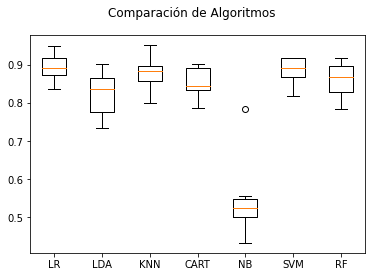

In [59]:
# boxplot comparación de algoritmos
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

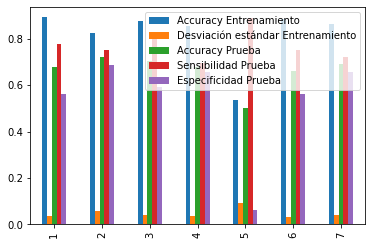

In [60]:
import matplotlib.pyplot as plt 
dfmc.plot(kind='bar')

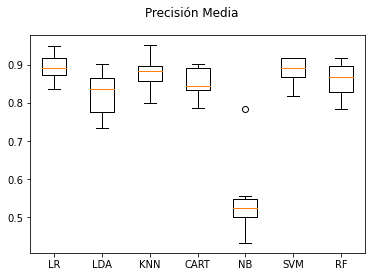

In [61]:
# boxplot comparación de algoritmos
fig = plt.figure()
fig.suptitle('Precisión Media')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

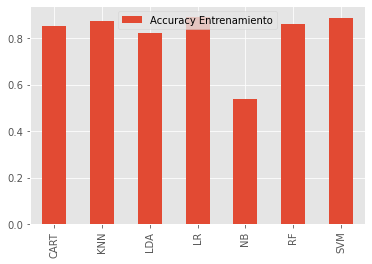

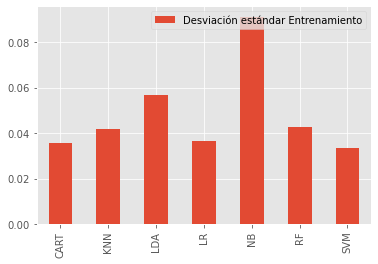

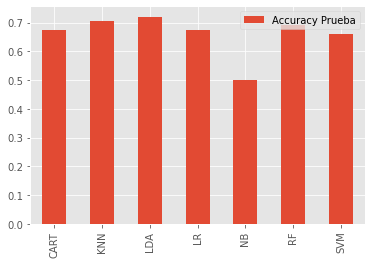

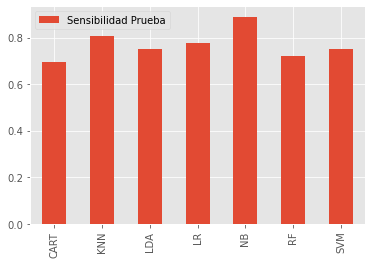

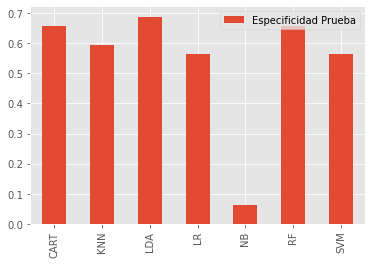

In [62]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
for i in range (1,6):
    table = pd.pivot_table(dfmc,index=names,values=[str(dfmc.columns[i])])
    table.plot(kind='bar')
    